<a href="https://colab.research.google.com/github/impk415/EpochTaskRepo/blob/main/epoch_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
map_data = gpd.read_file("India_State_Boundary.shp")

In [ ]:
df = pd.read_csv("clustering_data.csv", low_memory= False)

In [ ]:
df.set_index('StateName', inplace = True)

In [ ]:
home_df = df.loc['MAHARASHTRA']

In [ ]:
home_df

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,Latitude,Longitude
StateName,,,,,,,,,,
MAHARASHTRA,Maharashtra Circle,Nagpur Region,Amaravati Division,Bhatkuli S.O,444602,PO,Non Delivery,AMRAVATI,20.907,77.6026
MAHARASHTRA,Maharashtra Circle,Nagpur Region,Chandrapur Division,Subai B.O,442905,BO,Delivery,CHANDRAPUR,19.5733438,79.4422593
MAHARASHTRA,Maharashtra Circle,Nagpur Region,Chandrapur Division,Tembhuwahi B.O,442905,BO,Delivery,CHANDRAPUR,19.6924335,79.3571161
MAHARASHTRA,Maharashtra Circle,Nagpur Region,Chandrapur Division,Vihirgaon B.O,442905,BO,Delivery,CHANDRAPUR,19.7268087,79.453512
MAHARASHTRA,Maharashtra Circle,Aurangabad Region,Osmanabad Division,Nilegaon B.O,413603,BO,Delivery,OSMANABAD,18.010041,76.0710641
...,...,...,...,...,...,...,...,...,...,...
MAHARASHTRA,Maharashtra Circle,Nagpur Region,Chandrapur Division,Ghugus Colliery S.O,442505,PO,Delivery,CHANDRAPUR,19.9405833,79.12025
MAHARASHTRA,Maharashtra Circle,Nagpur Region,Chandrapur Division,Gondpipri S.O,442702,PO,Delivery,CHANDRAPUR,19.7183889,79.6864722
MAHARASHTRA,Maharashtra Circle,Nagpur Region,Chandrapur Division,Kurkheda S.O,441209,PO,Delivery,GADCHIROLI,20.6203889,80.2088889


In [ ]:
home_df.Pincode.nunique()

1585

In [ ]:
# dropping the duplicates
home_df = home_df.drop_duplicates(subset = ['Pincode'])

In [ ]:
home_df.Latitude = home_df.Latitude.str.replace('-', '', regex = False)
home_df.Longitude = home_df.Longitude.str.replace('-', '', regex = False)

<ipython-input-135-8607ddfe785f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df.Latitude = home_df.Latitude.str.replace('-', '', regex = False)
<ipython-input-135-8607ddfe785f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df.Longitude = home_df.Longitude.str.replace('-', '', regex = False)


In [ ]:
home_df = home_df.loc[(pd.to_numeric(home_df.Latitude) >= 15.349999) & (pd.to_numeric(home_df.Latitude) <= 22.01999)]
home_df= home_df.loc[(pd.to_numeric(home_df.Longitude) >= 72.34) & (pd.to_numeric(home_df.Longitude) <= 80.55)]

In [ ]:
map_data

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."
5,Jharkhand,"POLYGON ((9762288.285 2772949.712, 9762301.816..."
6,Karnataka,"MULTIPOLYGON (((8608594.474 2090389.205, 86086..."
7,Kerala,"POLYGON ((8347733.191 1436381.747, 8347795.745..."
8,Lakshadweep,"MULTIPOLYGON (((8135256.290 930182.487, 813526..."
9,Madhya Pradesh,"POLYGON ((8724343.278 3106498.184, 8724579.382..."


In [ ]:
map_data.set_index("State_Name", inplace = True)

<Axes: >

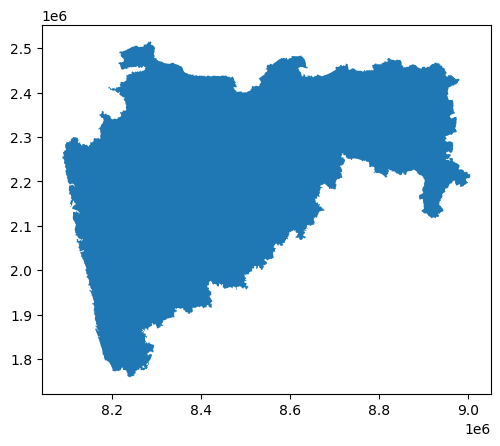

In [ ]:
home_state_data = map_data.loc[['Maharashtra']]
home_state_data.plot()

In [ ]:
home_df = home_df.loc['MAHARASHTRA', ['Latitude', 'Longitude']]

# if i want a specific column, we can do like above, but if we want specific rows, we can do\
# df.loc[df.StateName == 'GUJARAT'], extracts only those rows which has state 'GUJARAT'.
home_df = home_df.dropna()

In [ ]:
home_df['Latitude'] = pd.to_numeric(home_df.Latitude)
home_df['Longitude'] = pd.to_numeric(home_df.Longitude)

In [ ]:
home_gdf = gpd.GeoDataFrame(home_df, geometry= gpd.points_from_xy(home_df['Longitude'], home_df['Latitude']))

In [ ]:
home_gdf

,Latitude,Longitude,geometry
StateName,,,
MAHARASHTRA,20.907000,77.602600,POINT (77.60260 20.90700)
MAHARASHTRA,19.573344,79.442259,POINT (79.44226 19.57334)
MAHARASHTRA,18.010041,76.071064,POINT (76.07106 18.01004)
MAHARASHTRA,18.449512,75.675819,POINT (75.67582 18.44951)
MAHARASHTRA,17.863953,76.478571,POINT (76.47857 17.86395)
...,...,...,...
MAHARASHTRA,21.003599,75.491717,POINT (75.49172 21.00360)
MAHARASHTRA,19.988439,73.720725,POINT (73.72073 19.98844)
MAHARASHTRA,19.988439,73.720725,POINT (73.72073 19.98844)


In [ ]:
maharashtra_map = gpd.read_file('maharashtra.topo.json')

<Figure size 2000x1600 with 0 Axes>

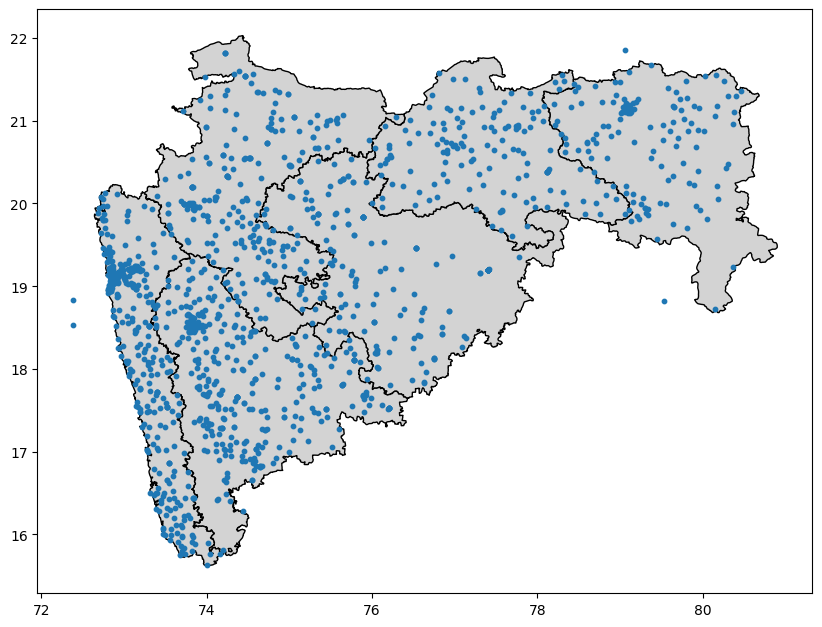

In [ ]:
plt.figure(figsize=(20, 16))
fig, ax = plt.subplots(figsize=(10, 10))
maharashtra_map.plot(ax=ax, color='lightgrey', edgecolor='black')
home_gdf.plot(ax=ax, markersize = 10)
plt.show()

**we need to have a matrix X whose shape will be m*2**

In [ ]:
latitude_array = home_df.Latitude.to_numpy()
longitude_array = home_df.Longitude.to_numpy()

In [ ]:
X = np.column_stack((longitude_array, latitude_array))
X

array([[77.6026   , 20.907    ],
       [79.4422593, 19.5733438],
       [76.0710641, 18.010041 ],
       ...,
       [73.720725 , 19.988439 ],
       [79.3417778, 19.86125  ],
       [79.1494167, 20.1171111]])

**determine K for K -means**

In [ ]:
# let
K = 36
# will also try taking K = 2/K = 4

In [ ]:
# initially..we need to pick k random training examples
randIdx = np.random.permutation(X.shape[0])

In [ ]:
# centroids array dimension are K*2..contains the position for the k centroids
centroids = X[randIdx[:K]]

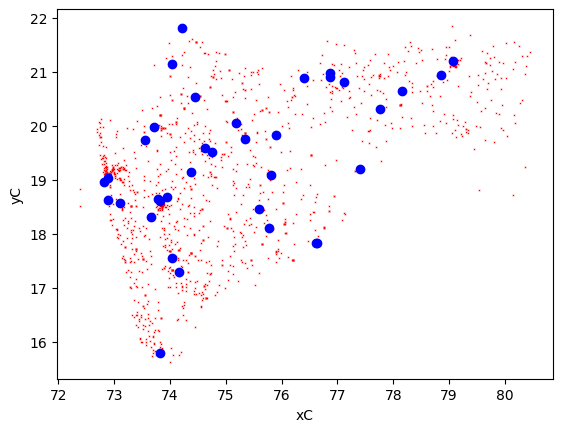

In [ ]:
# let's try to plot and visualize the chosen cluster centroids in the plane
x_coord = centroids[:,0]
y_coord = centroids[:,1]
plt.scatter(X[:,0], X[:,1], c = 'r', marker = 'x', s = 0.1)
plt.scatter(x_coord, y_coord, c = 'b', marker = 'o')
plt.xlabel("xC")
plt.ylabel("yC")
plt.show()

In [ ]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): k centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)
    no_of_training_examples = X.shape[0]

    for i in range(no_of_training_examples):
        costs = np.zeros(K)
        for j in range (K):
            costs[j] = np.linalg.norm(X[i] - centroids[j])
        idx[i] = np.argmin(costs)

    return idx

In [ ]:
# write a function to find the mean of the new centroid positions
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

    for i in range (K):
        points_assigned = X[idx == i]
        centroids[i] = np.mean(points_assigned, axis=0)

    return centroids

In [ ]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

In [ ]:
def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx, s = 10)

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)


     #Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)

    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])

    plt.title("Iteration number %d" %i)

In [ ]:
idx = find_closest_centroids(X,centroids)

In [ ]:
centroids = compute_centroids(X,idx,K)

K-Means iteration 0/19
K-Means iteration 1/19
K-Means iteration 2/19
K-Means iteration 3/19
K-Means iteration 4/19
K-Means iteration 5/19
K-Means iteration 6/19
K-Means iteration 7/19
K-Means iteration 8/19
K-Means iteration 9/19
K-Means iteration 10/19
K-Means iteration 11/19
K-Means iteration 12/19
K-Means iteration 13/19
K-Means iteration 14/19
K-Means iteration 15/19
K-Means iteration 16/19
K-Means iteration 17/19
K-Means iteration 18/19
K-Means iteration 19/19


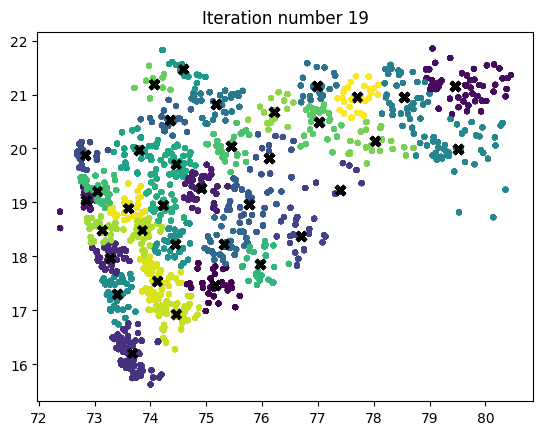

In [ ]:
# Set initial centroids
K = 36

# Number of iterations
max_iters = 20

centroids, idx = run_kMeans(X, centroids, max_iters, plot_progress=True)

<Figure size 2000x1600 with 0 Axes>

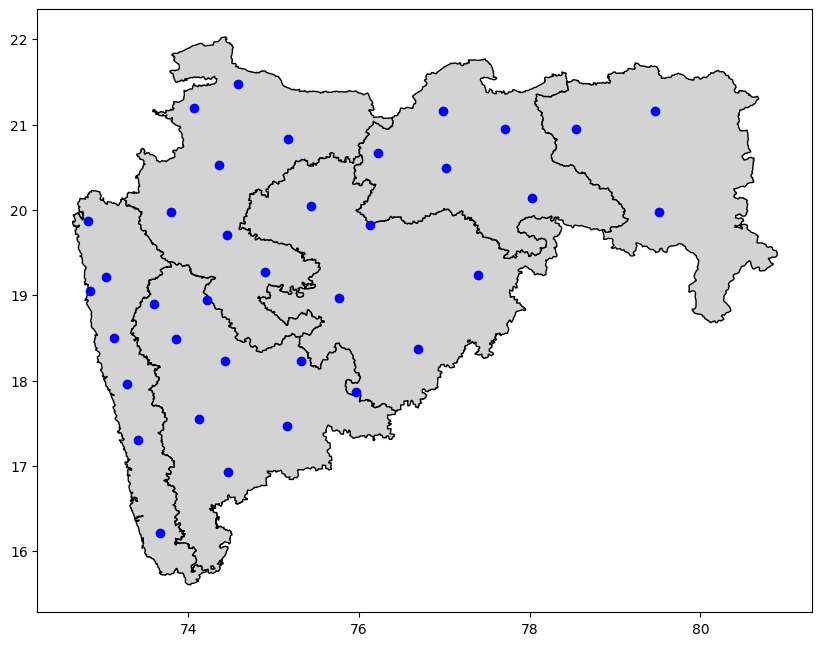

In [ ]:
# let's try to again plot and visualize the chosen cluster centroids in the plane
plt.figure(figsize=(20, 16))
fig, ax = plt.subplots(figsize=(10, 10))
maharashtra_map.plot(ax=ax, color='lightgrey', edgecolor='black')
x_coord = centroids[:,0]
y_coord = centroids[:,1]
ax.scatter(x_coord, y_coord,c = 'b', marker = 'o')
plt.show()